# Setting up learning model

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 as cv2

In [2]:
df = pd.read_csv("Syndicate/IDRBT-Cheque-Image-Dataset/300/list.csv")
lp = pd.read_csv("dataset/list.csv")

In [3]:
lp

Unnamed: 0       Id  val
0             0  100.jpg    0
1             1  101.jpg    0
2             2  102.jpg    0
3             3  103.jpg    0
4             4  104.jpg    0
..          ...      ...  ...
347         347   96.jpg    0
348         348   97.jpg    0
349         349   98.jpg    0
350         350   99.jpg    0
351         351    9.jpg    1

[352 rows x 3 columns]

# training tampered handwriting detection model

In [130]:
images_train = [tf.keras.utils.normalize(cv2.resize(cv2.imread('dataset/'+x,0),(145,14))) for x in lp['Id'][0:200]]
images_test = [tf.keras.utils.normalize(cv2.resize(cv2.imread('dataset/'+x,0),(145,14))) for x in lp['Id'][200:]]

In [131]:
y_train = list(lp['val'][0:200])
for i,x in enumerate(y_train):
    if x==2:
        y_train[i]=0
y_test = list(lp['val'][200:])
for i,x in enumerate(y_test):
    if x==2:
        y_test[i]=0

images_train =  np.array(images_train).reshape(200, 145, 14,1)
images_test = np.array(images_test).reshape(152, 145, 14,1)


In [132]:
%load_ext tensorboard
%tensorboard --logdir log

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 8156), started 2:18:25 ago. (Use '!kill 8156' to kill it.)

In [139]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
model = tf.keras.Sequential()

# block 1
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(145, 14,1)))
model.add(MaxPooling2D((3, 3)))
#model.add(Conv2D(64, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(2,activation = "sigmoid"))

In [140]:
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])

In [142]:
model.fit(images_train,y_train,epochs = 5,batch_size=4,callbacks=[tf.keras.callbacks.TensorBoard('log',histogram_freq=1)])

Epoch 1/5
200/200 [==============================] - 0s 2ms/sample - loss: 0.5526 - acc: 0.7550
Epoch 2/5
200/200 [==============================] - 1s 3ms/sample - loss: 0.5004 - acc: 0.7650
Epoch 3/5
200/200 [==============================] - 1s 3ms/sample - loss: 0.3712 - acc: 0.8900
Epoch 4/5
200/200 [==============================] - 1s 3ms/sample - loss: 0.2801 - acc: 0.8950
Epoch 5/5
200/200 [==============================] - 1s 3ms/sample - loss: 0.2256 - acc: 0.9250


In [143]:
predict = model.predict_classes(images_train)
images_tn = [cv2.resize(cv2.imread('dataset/'+x,0),(1450,140)) for x in lp['Id'][0:200]]


0


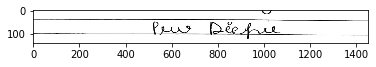

0


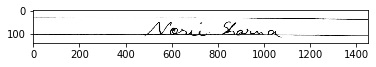

0


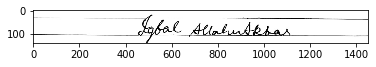

0


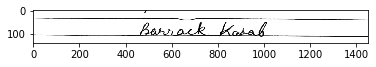

0


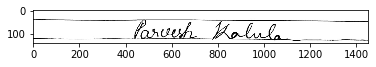

0


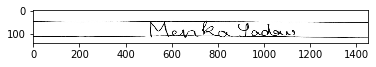

1


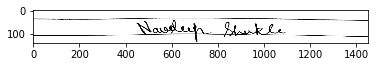

0


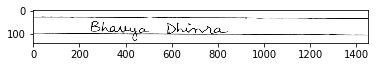

1


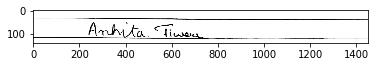

0


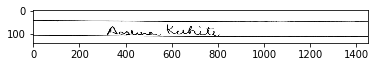

0


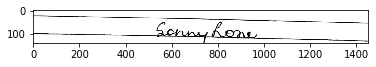

0


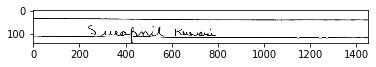

1


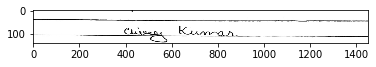

0


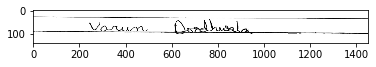

1


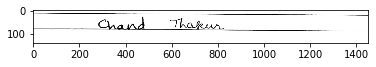

1


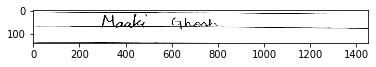

1


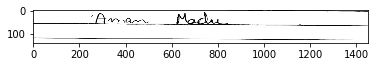

0


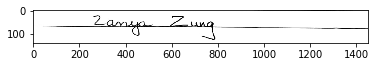

1


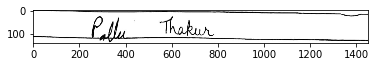

1


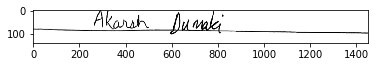

1


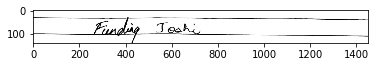

1


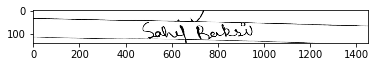

1


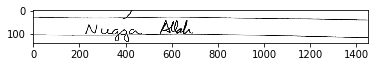

0


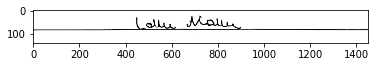

1


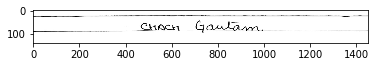

1


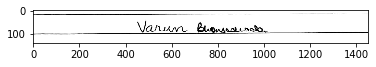

1


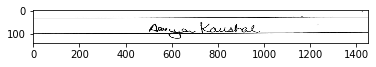

0


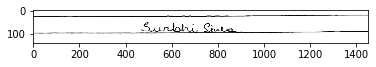

0


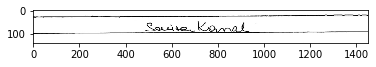

0


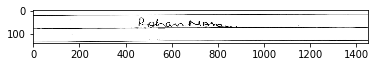

0


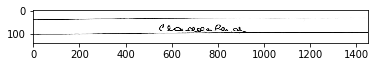

1


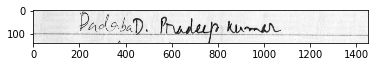

1


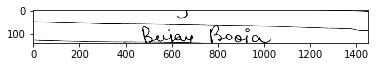

1


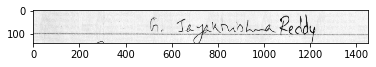

0


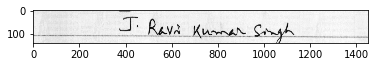

0


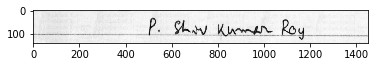

0


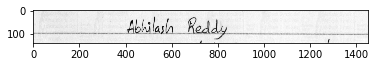

0


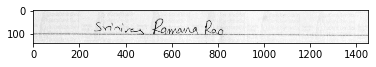

1


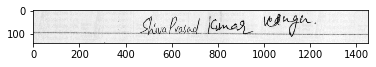

0


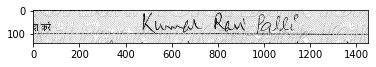

0


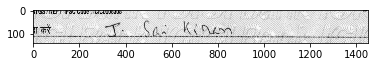

0


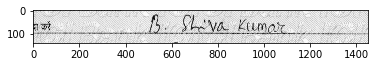

0


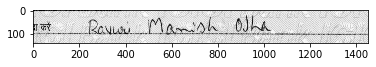

1


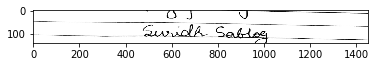

1


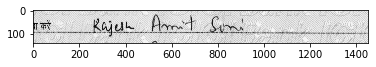

0


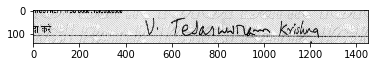

0


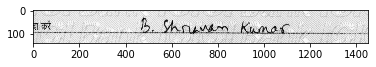

1


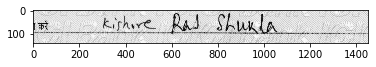

0


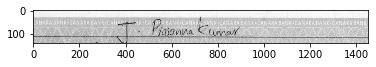

0


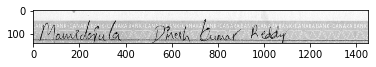

1


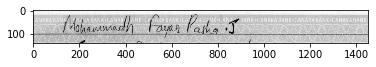

0


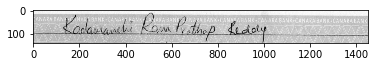

1


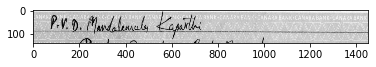

0


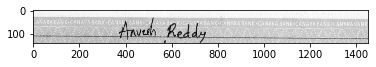

0


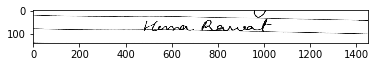

0


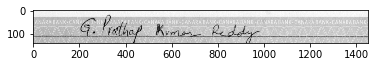

1


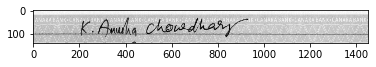

1


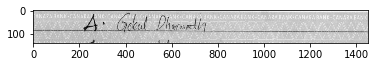

0


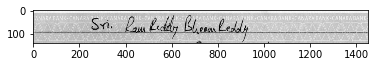

0


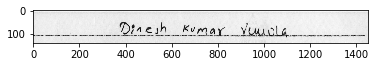

0


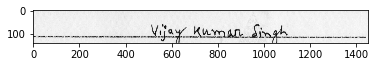

1


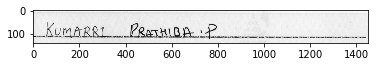

1


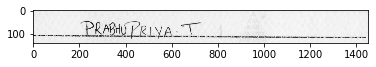

0


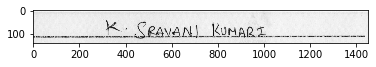

0


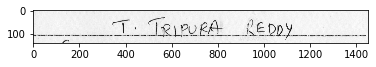

0


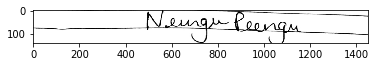

0


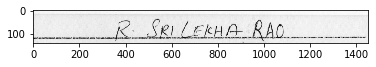

0


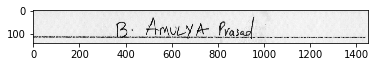

0


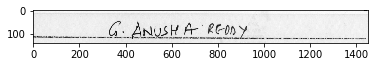

1


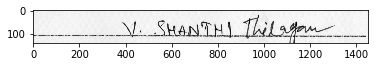

0


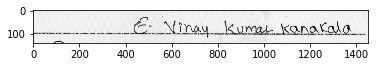

1


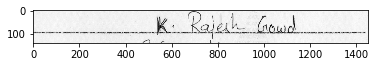

0


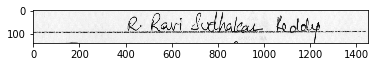

1


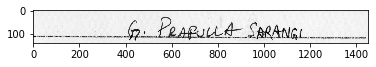

0


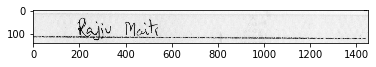

0


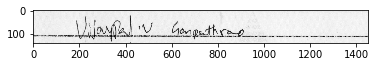

0


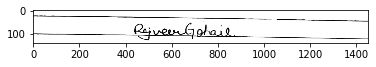

0


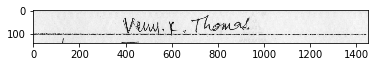

1


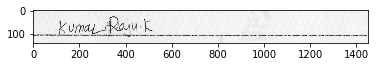

1


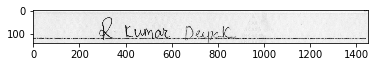

0


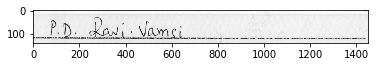

1


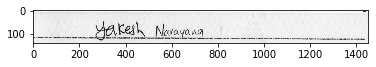

1


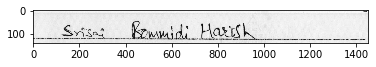

1


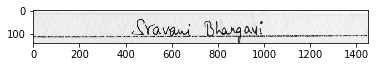

0


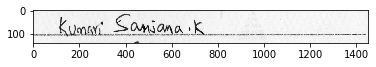

0


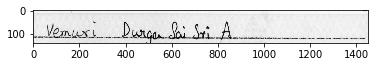

0


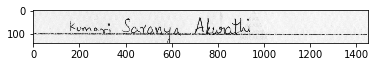

0


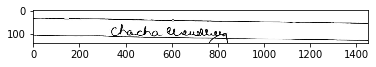

1


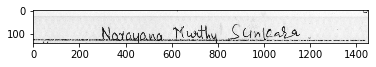

0


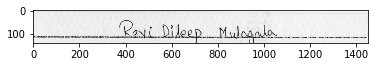

1


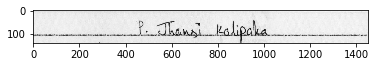

0


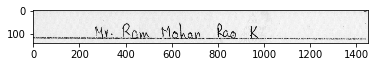

0


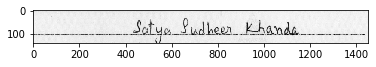

0


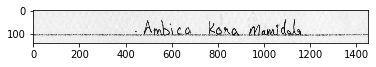

0


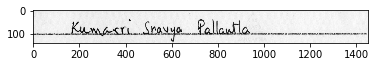

0


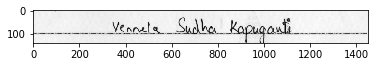

1


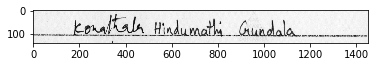

1


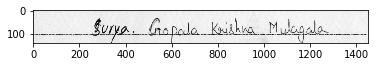

1


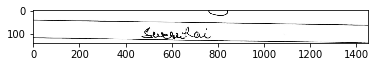

1


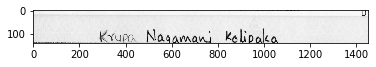

1


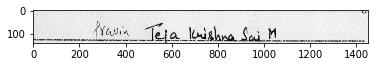

0


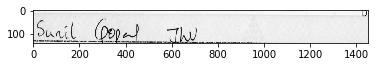

0


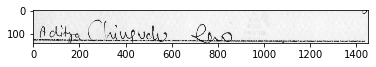

0


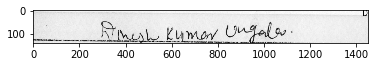

0


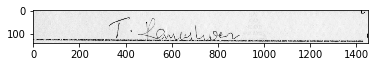

0


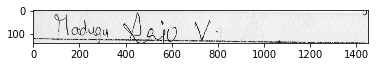

0


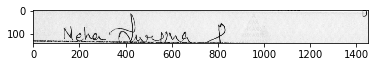

0


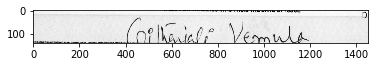

0


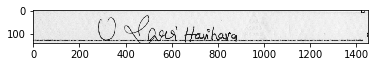

1


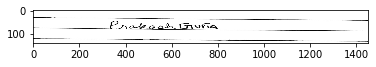

1


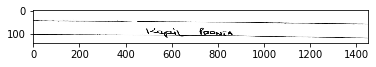

0


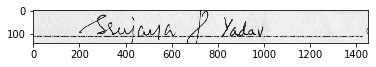

1


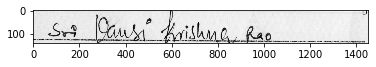

1


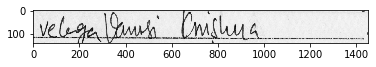

0


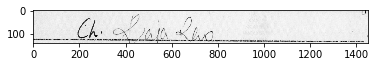

0


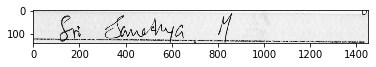

1


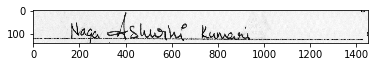

1


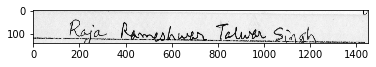

0


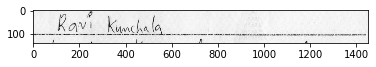

0


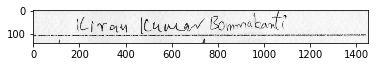

0


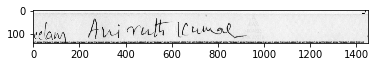

1


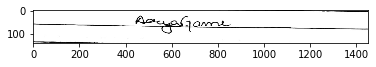

0


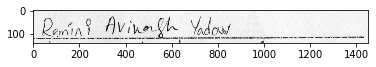

0


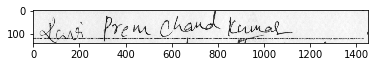

0


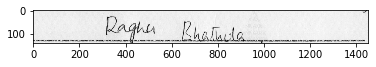

0


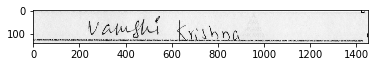

0


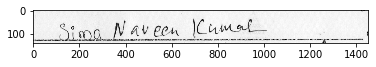

0


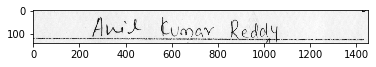

1


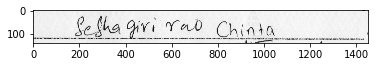

1


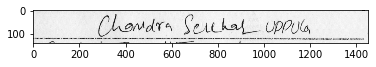

1


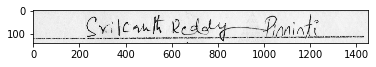

1


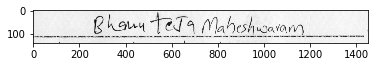

1


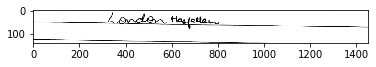

0


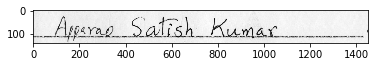

1


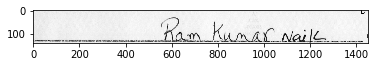

1


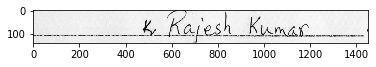

1


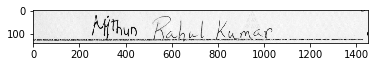

1


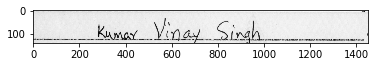

0


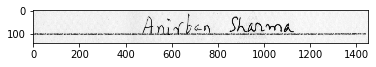

0


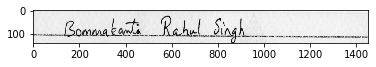

0


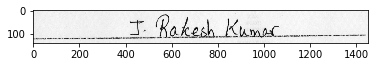

0


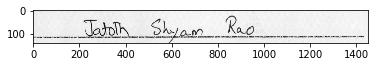

0


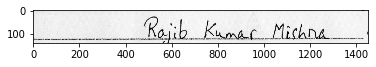

1


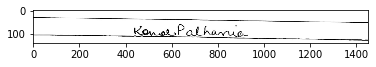

1


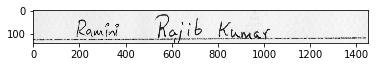

0


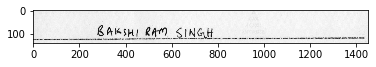

0


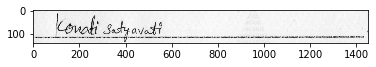

0


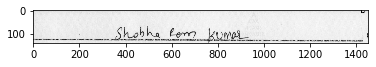

0


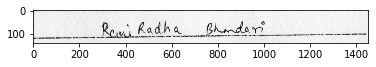

0


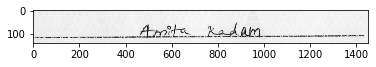

0


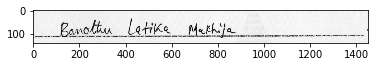

0


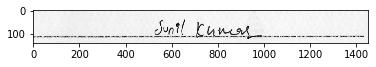

0


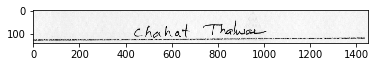

1


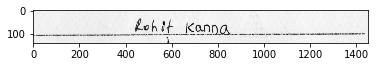

0


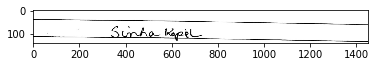

0


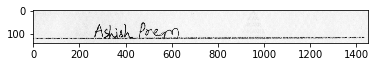

1


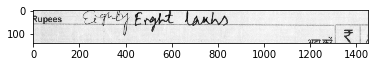

0


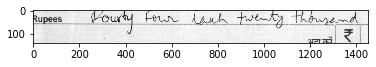

0


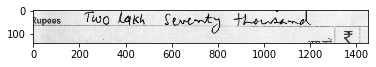

0


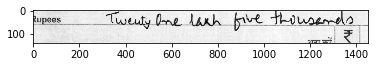

1


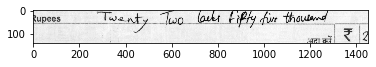

0


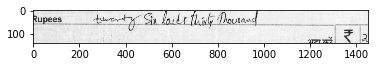

0


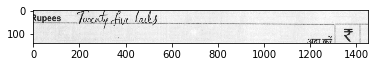

1


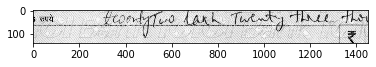

0


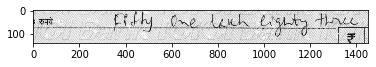

1


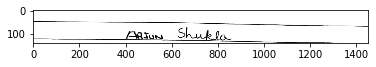

0


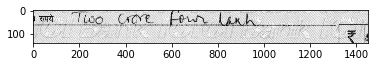

0


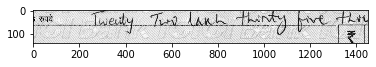

1


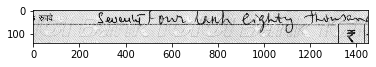

0


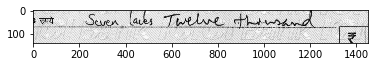

0


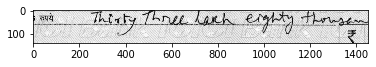

1


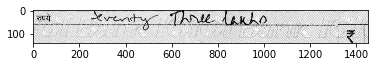

1


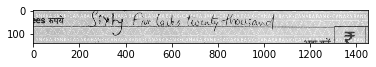

0


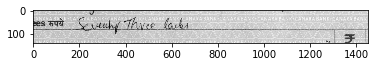

1


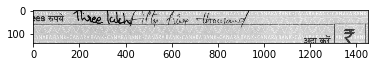

1


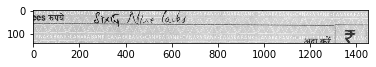

1


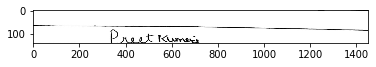

0


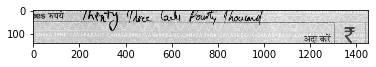

0


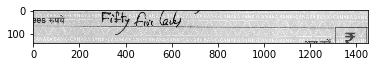

0


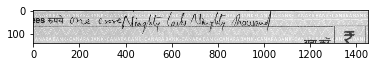

0


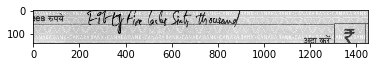

1


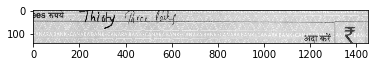

0


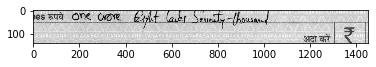

1


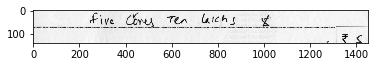

0


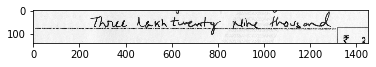

1


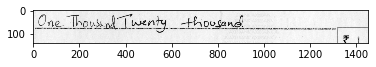

0


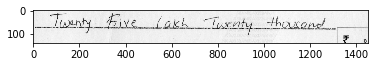

1


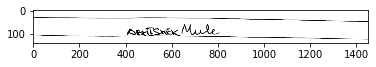

0


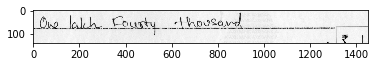

0


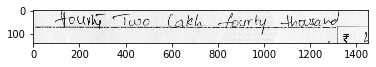

1


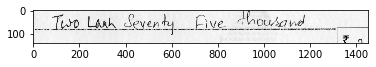

0


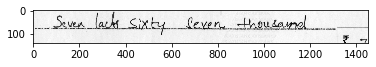

0


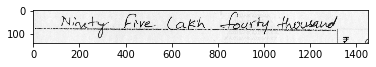

1


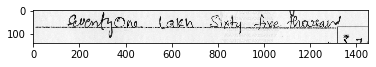

1


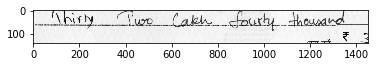

0


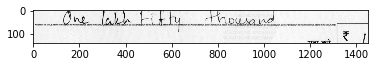

0


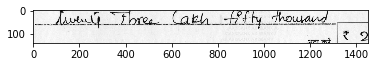

0


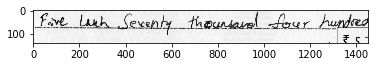

0


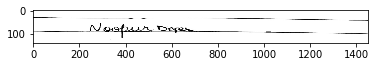

1


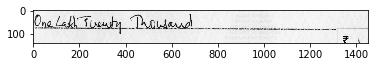

In [144]:
for i in range(0,200):
    print(predict[i])
    plt.imshow(images_tn[i],cmap='gray')
    plt.show()

In [145]:
# SAVE MODEL
json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(json)
model.save_weights('model.h5')

In [146]:
images = [cv2.resize(cv2.imread('Syndicate/IDRBT-Cheque-Image-Dataset/400/'+x[:-4]+".jpg",0),(2300,1100)) for x in df['.:']]

In [209]:
def name(img):
    plt.imshow(img,cmap='gray')
    plt.show()
    img1 = img[160:340,200:1600]
    img1 = tf.keras.utils.normalize(cv2.resize(img1,(145,14)))
    img1 = np.array(img1).reshape((1, 145, 14,1))
    predict = model.predict_classes(img1)
    if predict[0] == 1:
        print("name is tampered")
    img2 = img[320:500,200:1800]
    img2 = tf.keras.utils.normalize(cv2.resize(img2,(145,14)))
    img2 = np.array(img2).reshape((1, 145, 14,1))
    predict = model.predict_classes(img2)
    if predict[0] == 1:
        print("amount is tampered")

## missing signature check

In [210]:
def signature(img):
    ret,img =cv2.threshold(img,110,255,cv2.THRESH_BINARY)
    #plt.imshow(img[650:1000,1700:2200],cmap='gray')
    #plt.show()
    img = img[650:1000,1700:2200]
    count = 0
    for x in range (0,350):
        for y in range (0,400):
            if img[x][y] < 100:
                count = count + 1
    #print(count)
    if count < 800:
        print("signature missing")

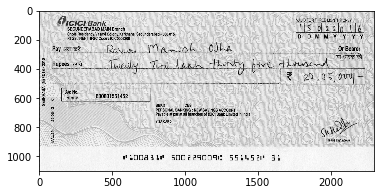

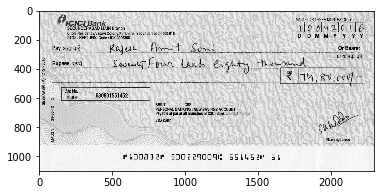

amount is tampered


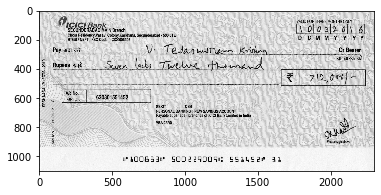

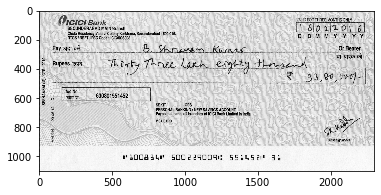

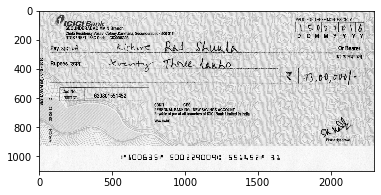

amount is tampered


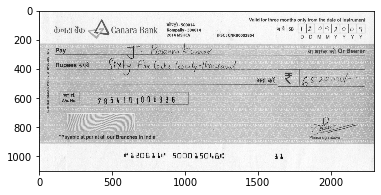

name is tampered
amount is tampered


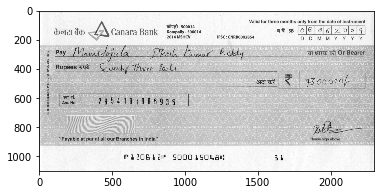

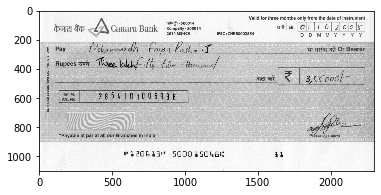

amount is tampered


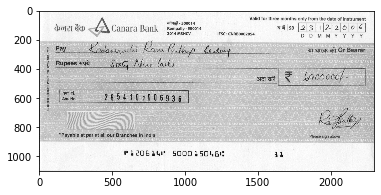

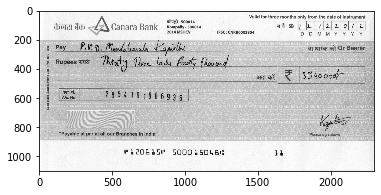

amount is tampered


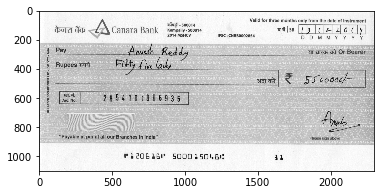

name is tampered


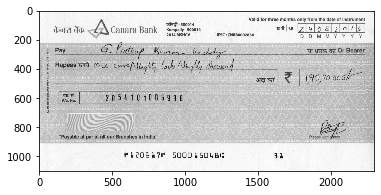

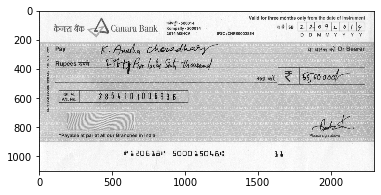

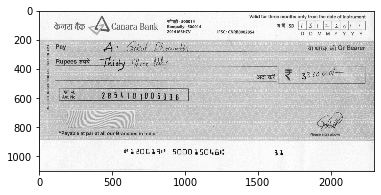

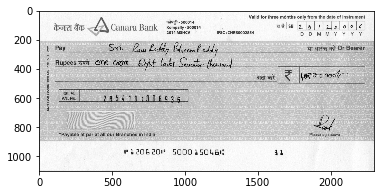

name is tampered


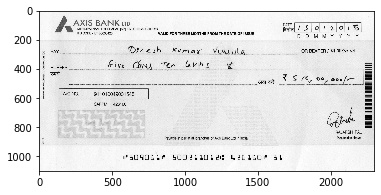

amount is tampered


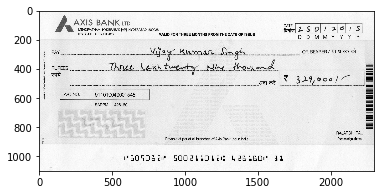

signature missing


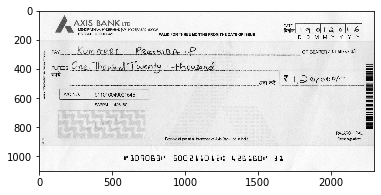

signature missing


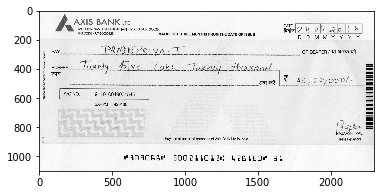

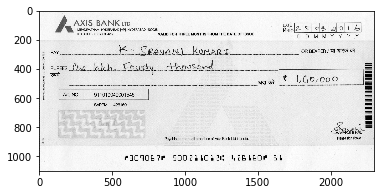

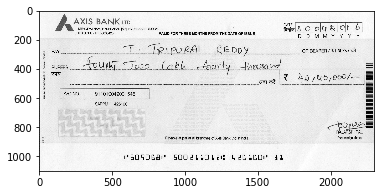

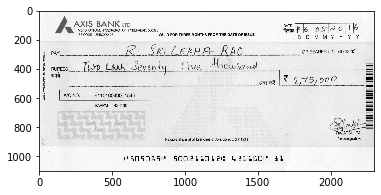

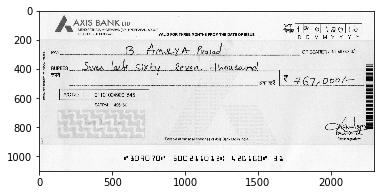

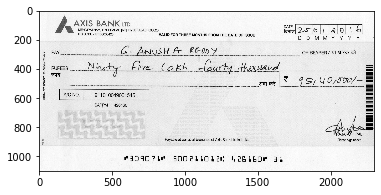

name is tampered


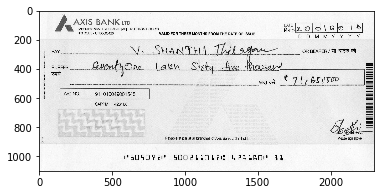

amount is tampered


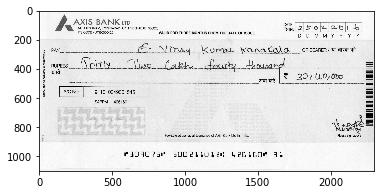

amount is tampered


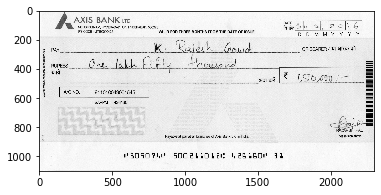

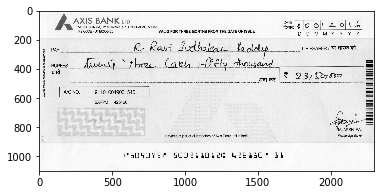

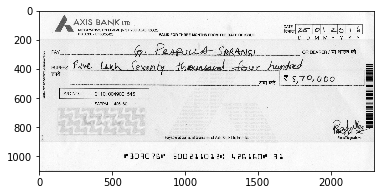

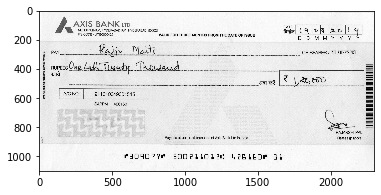

name is tampered
amount is tampered


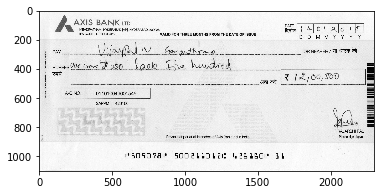

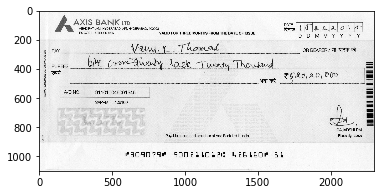

amount is tampered


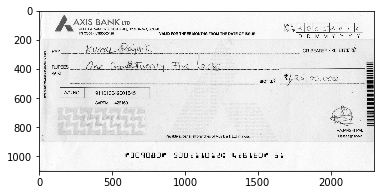

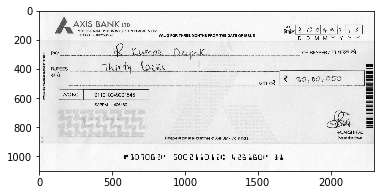

name is tampered
amount is tampered


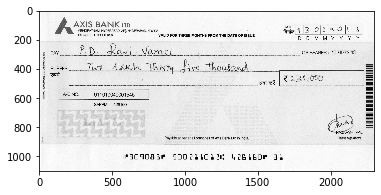

name is tampered
amount is tampered


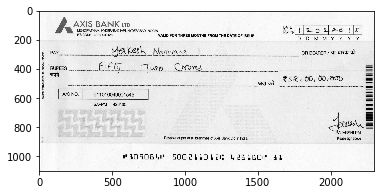

amount is tampered


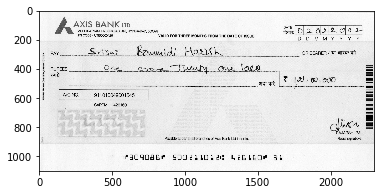

name is tampered


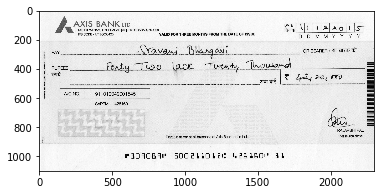

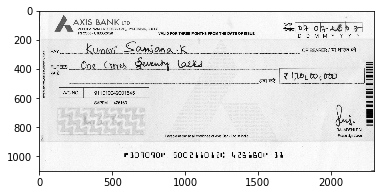

amount is tampered


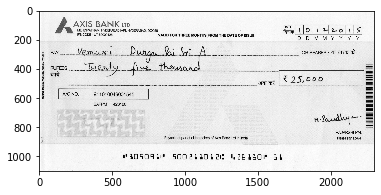

name is tampered
amount is tampered


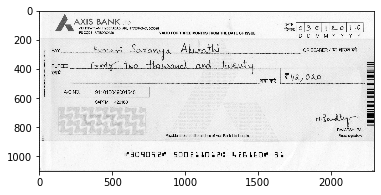

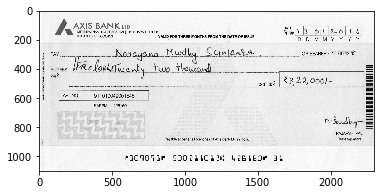

name is tampered
amount is tampered


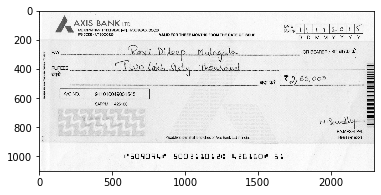

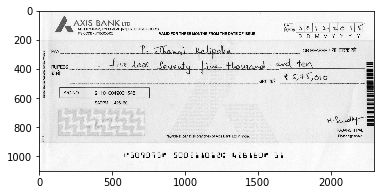

amount is tampered


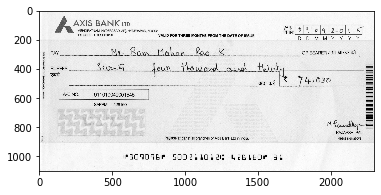

name is tampered
amount is tampered


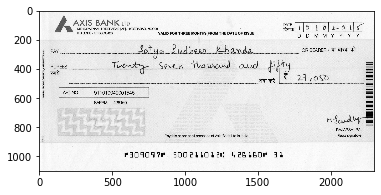

amount is tampered


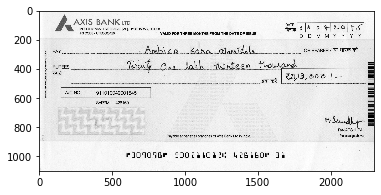

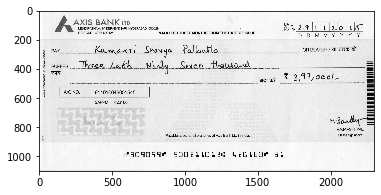

name is tampered


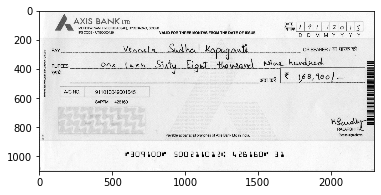

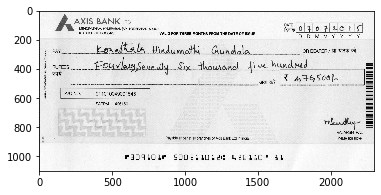

amount is tampered


In [211]:
for i in range(10,60):
    name(images[i])
    signature(images[i])